In [1]:
#autoreload
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
im=np.zeros((300,300))

In [4]:
iml=cv2.line(im,(50,50),(65,90),0.6,3)

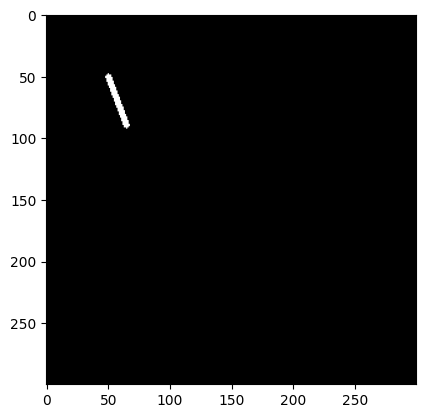

In [5]:
_=plt.imshow(iml,cmap='gray')

In [13]:
def spline(P0,P1,P2,t):
    return (1-t)*(1-t)*P0 +2*t*(1-t)*P1 + t*t*P2

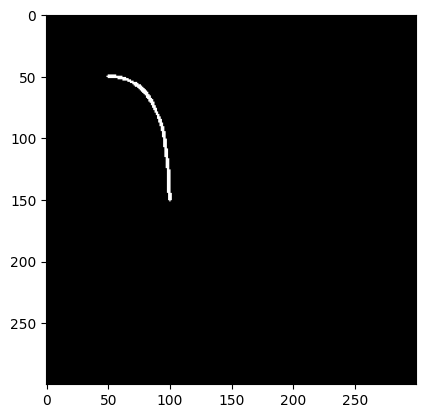

In [16]:
im=np.zeros((300,300))

P0=np.array([50.0,50])
P1=np.array([100.0,50])
P2=np.array([100.0,150])
puntos=[]
for t in np.linspace(0,1.0,20):
    p=spline(P0,P1,P2,t)
    puntos.append(p)
imp=cv2.polylines(im,[np.array(puntos).astype(np.int32)],False,0.6,2)
_=plt.imshow(imp>0,cmap='gray')

In [89]:
class SimulaDefectoRayos:
    '''
    Clase para simular defectos en una imagen rayos X
    El constructor recibe unos parámetros que definen la probabilidad de que haya un defecto y sus características
    así como la imagen a la que se le van a simular los defectos
    
    El método call simula los defectos en la imagen y devuelve la imagen con los defectos y la máscara de los defectos
    '''
    def __init__(self,params):

        self.params=params
    def __call__(self,im):
        a=np.random.rand()
        if a<self.params['prob_no_change']:
            return im,np.zeros_like(im)
        num_defects=np.random.randint(self.params['min_number_of_defects'],self.params['max_number_of_defects']+1)
        im_defects=np.zeros_like(im)
        for k in range(num_defects):
            defect_intensity=np.random.uniform(self.params['min_defect_intensity'],self.params['max_defect_intensity'])
            defect_size=np.random.uniform(self.params['min_defect_size'],self.params['max_defect_size'])
            defect_width=np.random.uniform(self.params['min_defect_width'],self.params['max_defect_width']) 
            center_x=np.random.uniform(0.15,0.85)*im.shape[1]
            center_y=np.random.uniform(0.15,0.85)*im.shape[0]
            orientation=np.random.uniform(0,2*np.pi)
            
            pp=np.array([center_x,center_y])
            vv=np.array([np.cos(orientation),np.sin(orientation)])
            P0=pp-defect_size*vv/2
            P2=pp+defect_size*vv/2
            P1=(P0+P2)/2+np.random.uniform(-defect_size/3,defect_size/3)*np.array([-vv[1],vv[0]])
            
            puntos=[]
            for t in np.linspace(0,1.0,20):
                p=spline(P0,P1,P2,t)
                puntos.append(p)
            puntos=np.array(puntos,dtype=int)
            copia=np.zeros_like(im)
            print('Dibujando with',defect_intensity,defect_width)
            im_defects += cv2.polylines(copia,[puntos],False,defect_intensity, int(defect_width+0.5))
        #print(im_defects.shape)


        return im-im_defects , im_defects>0

Dibujando with 0.1794627703062709 7.730373311845236
Dibujando with 0.12672708747302583 3.726368945825802
Dibujando with 0.18069425107430237 5.8203031874499
(800, 800) (800, 800)
(800, 800)


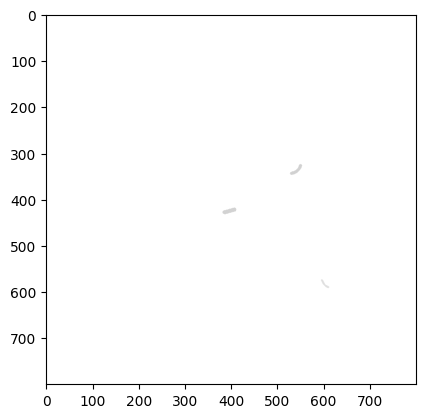

In [113]:
im=np.ones((800,800),dtype=np.float32)
params={
    'prob_no_change':0.5,
    'min_number_of_defects':1,
    'max_number_of_defects':5,
    'min_defect_intensity':0.1,
    'max_defect_intensity': 0.3,
    'min_defect_size':20,
    'max_defect_size':50,
    'min_defect_width':3,
    'max_defect_width':10,
}
simulador=SimulaDefectoRayos(params)
res=simulador(im)
_=plt.imshow(res[0],cmap='gray',clim=[0,1])


In [67]:
type(res[0]),type(res[1])

(numpy.ndarray, numpy.ndarray)